In [1]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
     |████████████████████████████████| 576.2MB 22kB/s 


In [2]:
!pip install fastai

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd
import torch.nn as nn
import cv2

In [0]:
t = Path('./gdrive/My Drive/images/train/')

In [5]:
!pwd

/content


In [0]:
# images/train/chain_id/hotel_id/data_source/image_id.jpg
def extract_train(limit=False):
    data = []
    i = 0
    for chain_id in t.ls():
        for hotel_id in chain_id.ls():
            for d_source in hotel_id.ls():
                for image_id in d_source.ls():
                    i += 1
                    data.append([chain_id.name, 
                                 hotel_id.name, 
                                 d_source.name, 
                                 image_id.name,
                                 str(image_id)])
                    if limit and i > 2000:
                        return data

In [0]:
data = extract_train(limit=True)

In [0]:
data_df = pd.DataFrame(data, columns=['chain_id',
                              'hotel_id',
                              'd_source',
                              'image_id',
                              'path'])

In [40]:
data_df.head()

,chain_id,hotel_id,d_source,image_id,path
0,3,18187,traffickcam,3485.jpg,gdrive/My Drive/images/train/3/18187/traffickc...
1,3,18187,traffickcam,3486.jpg,gdrive/My Drive/images/train/3/18187/traffickc...
2,3,18187,travel_website,1192035.jpg,gdrive/My Drive/images/train/3/18187/travel_we...
3,3,18187,travel_website,1192037.jpg,gdrive/My Drive/images/train/3/18187/travel_we...
4,3,18187,travel_website,1192039.jpg,gdrive/My Drive/images/train/3/18187/travel_we...


Tried some series of data augmentation:

In [0]:
batch_size = 16
img_size = 224
ds_tfms = get_transforms(max_rotate=35, max_zoom=1.4, max_lighting=0.2, max_warp=0.4, p_affine=1.0, p_lighting=1.0)
label_col = 1 # hotel_id


# If the class has only 1 image, we want it to be in the train-set.
# TODO Fix: https://forums.fast.ai/t/kaggle-humpback-whale-identification/35934
data = ImageDataBunch.from_df('.', 
                              data_df, 
                              label_col=label_col,
                              fn_col=-1, 
                              ds_tfms=ds_tfms, 
                              size=img_size,
                              padding_mode = 'zeros',
                              bs=batch_size)

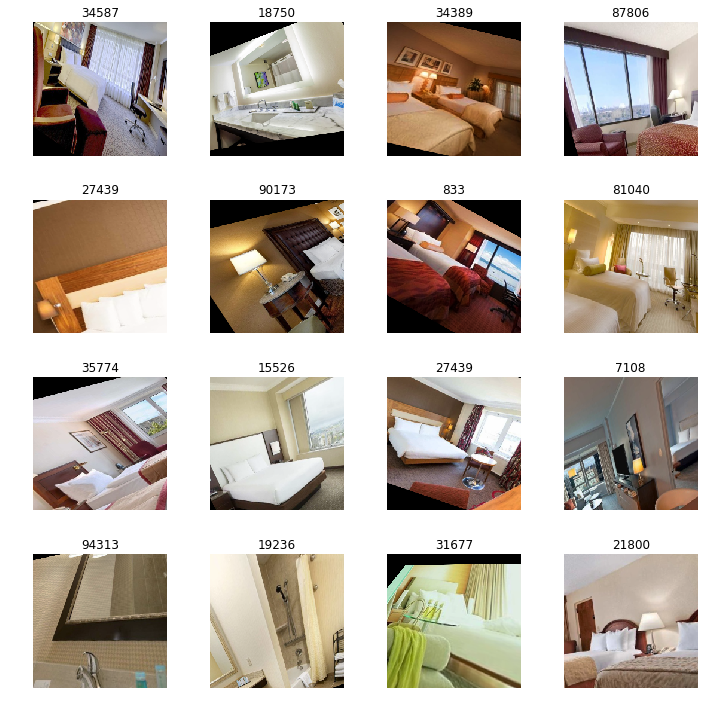

In [51]:
data.show_batch(rows=5, figsize=(10, 10))